## Business Understanding

**Project Description:**

Explore the Indian startup funding ecosystem through an in-depth analysis of funding data from 2019 to 2021. Gain insights into key trends, funding patterns, and factors driving startup success. Investigate the relationship between funding and startup growth, with a focus on temporal patterns and city-level dynamics. Identify preferred sectors for investment and uncover industry-specific funding trends. This exploratory data analysis provides a comprehensive overview of the Indian startup ecosystem, offering valuable insights for entrepreneurs, investors, and policymakers.

## Data Understanding

This project aims to explore and gain a deeper understanding of the Indian startup funding ecosystem. The dataset used for analysis contains information about startup funding from 2019 to 2021. The dataset includes various attributes such as the company's name, sector, funding amount, funding round, investor details, and location.

To conduct a comprehensive analysis, we will examine the dataset to understand its structure, contents, and any potential data quality issues. By understanding the data, we can ensure the accuracy and reliability of our analysis.

The key attributes in the dataset include:

- **Company**: The name of the startup receiving funding.
- **Sector**: The industry or sector to which the startup belongs.
- **Amount**: The amount of funding received by the startup.
- **Stage**: The round of funding (e.g., seed, series A, series B).
- **Location**: The city or region where the startup is based.
- **About**: What the company does.
- **Funding Year**:When the company was funded

By examining these attributes, we can uncover insights about the funding landscape, identify trends in funding amounts and rounds, explore the preferred sectors for investment, and analyze the role of cities in the startup ecosystem.

Throughout the analysis, we will use visualizations and statistical techniques to present the findings effectively. By understanding the data and its characteristics, we can proceed with confidence in our analysis, derive meaningful insights, and make informed decisions based on the findings.

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [410]:
data_2018 = pd.read_csv('./data/startup_funding2018.csv')
data_2019 = pd.read_csv('./data/startup_funding2019.csv')
data_2020 = pd.read_csv('./data/startup_funding2020.csv')
data_2021 = pd.read_csv('./data/startup_funding2021.csv')

## Hypothesis and Questions


Ho = Funding is not dependent on industry/sector.

Ha = Funding is highly dependent on the industry/sector a company is in.




1. What industry received the most funding?
2. Which locations receives more funding?
3. In which year is funding the highest?
4. How many compnies received funding above $100,000,000 and what industry are they in?
5. For companies in the pre-seed stage of funding, how much is the average pre-seed amount, and what industry are they in?

### Exploratory Data Analysis

In [411]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [412]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [413]:
data_2020.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9'],
      dtype='object')

In [414]:
data_2021.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

### Change 2018 columns to match column specified in the project

In [415]:
data_2018.rename(columns={'Company Name': 'Company/Brand', 
                          'Industry':'Sector',
                          'About Company': 'What it does',
                          'Amount': 'Amount($)',
                          'Location': 'HeadQuarter',
                          'Round/Series': 'Stage'}, inplace=True)

In [416]:
data_2018.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does'],
      dtype='object')

In [417]:
data_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [418]:
data_2018['Founders'] = np.nan
data_2018['Investor'] = np.nan

In [419]:
data_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN


In [420]:
data_2018.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Founders', 'Investor'],
      dtype='object')

### Dropping all Founded columns since it is not required for the project

In [421]:
data_2019.drop(columns='Founded', inplace=True)
data_2020.drop(columns='Founded', inplace=True)
data_2021.drop(columns='Founded', inplace=True)
data_2020.drop(columns='Unnamed: 9', inplace=True)

### Let me Track the year a company was funded to accurately answer my hypothesis question

In [422]:
data_2018['Year'] = '2018'
data_2019['Year'] = '2019'
data_2020['Year'] = '2020'
data_2021['Year'] = '2021'

In [423]:
data_2018.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Founders', 'Investor', 'Year'],
      dtype='object')

In [424]:
data_2019.columns

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

In [425]:
data_2020.columns

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

In [426]:
data_2021.columns

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

### Merging all my difference dataframes

In [427]:
dataframe = [data_2018, data_2019, data_2020, data_2021]

In [428]:
data = pd.concat(dataframe, ignore_index=True)
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018


In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Sector         2861 non-null   object
 2   Stage          1941 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2765 non-null   object
 5   What it does   2879 non-null   object
 6   Founders       2334 non-null   object
 7   Investor       2253 non-null   object
 8   Year           2879 non-null   object
dtypes: object(9)
memory usage: 202.6+ KB


In [431]:
data.shape

(2879, 9)

In [432]:
data.duplicated().sum()

23

In [433]:
data.drop_duplicates(inplace=True)

In [434]:
data.duplicated().sum()

0

In [435]:
data.isna().sum()

Company/Brand      0
Sector            18
Stage            929
Amount($)          6
HeadQuarter      114
What it does       0
Founders         544
Investor         624
Year               0
dtype: int64

#### Checking for uniques values

In [436]:
data['Amount($)'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

### Creating a Feature to Identify the Original Currency for Conversion

Assumptions

Each entry in the 'Amount' column, if accompanied by a currency symbol, is denominated in that currency.

Entries without a currency symbol and with a length greater than 11 characters are assumed to be in Rupees.

The conversion rate used is based on the mid-year rate as of June 30, 2018.

In [437]:
data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace(',', ''))
data['Currency'] = data['Amount($)'].apply(lambda x: 'Rupees' if '₹' in x else 'Dollars')
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018,Dollars
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹40000000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018,Rupees
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹65000000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018,Rupees
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018,Dollars
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018,Dollars


In [438]:
data[data['Company/Brand'] == 'True Balance']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Currency
751,True Balance,FinTech,NaN,$28000000,Gurugram,True Balance is a digital wallet that enables ...,"Cheolwon Lee, Jay Yi, Martin Lee","IBK Capital, SB Partners",2020,Dollars
1080,True Balance,Finance,Series C,$887000 $23000000,Gurugram,Earn money by meeting financial needs of your ...,"Charlie, Jay, Martin",Balancehero,2020,Dollars
2417,True Balance,FinTech,Debt,$10000000,Gurugram,True Balance is a digital wallet that enables ...,"Cheolwon Lee, Jay Yi, Martin Lee","Bon Angels Venture Partners, Daesung Private E...",2021,Dollars
2598,True Balance,Financial Services,NaN,$30000000,Gurugram,"Balancehero India Private Limited (BHI), the w...",Cheolwon Lee,"Northern Arc, Arthmate, Shine Star, E clear, H...",2021,Dollars


In [439]:
data.drop(1080, axis=0, inplace=True)

In [440]:
def clean_amount():
    data['Amount($)'] = data['Amount($)'].astype(str)
    data['Amount($)'] = data['Amount($)'].str.strip()
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace('$', ""))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace('₹', ""))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: '_' if re.search('osed|n', x) else x)
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace('_', '0'))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace(',', ""))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace(' ', ""))
    data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce')
    data['Amount($)'] = data['Amount($)'].astype(float)
clean_amount()
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018,Dollars
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018,Rupees
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018,Rupees
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018,Dollars
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018,Dollars


In [441]:
data['Amount($)'].isna().sum()

156

In [442]:
missing_data = data['Amount($)'].isna().sum()
percentage = (missing_data/data.shape[0]) * 100
print(f'{percentage:.2f} % of our data is missing in the amount column')

5.46 % of our data is missing in the amount column


#### We now convert the values that were tracked as rupees to dollars

In [443]:
exchange_rage = 0.0146
condition = data['Currency'] == 'Rupees'
data.loc[condition, 'Amount($)'] = data.loc[condition, 'Amount($)'] * exchange_rage
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018,Dollars
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018,Rupees
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018,Rupees
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018,Dollars
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018,Dollars


Now let's delete the 'currency' column.

In [444]:
data.drop(columns='Currency', inplace=True)

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2855 non-null   object 
 1   Sector         2837 non-null   object 
 2   Stage          1926 non-null   object 
 3   Amount($)      2699 non-null   float64
 4   HeadQuarter    2741 non-null   object 
 5   What it does   2855 non-null   object 
 6   Founders       2311 non-null   object 
 7   Investor       2231 non-null   object 
 8   Year           2855 non-null   object 
dtypes: float64(1), object(8)
memory usage: 223.0+ KB


#### Now to deal with the HeadQuarters with multiple locations

Assumption

1. The first place listed is the principal headquaters
2. Since the entire dataset is about India, India can be dropped as well


Note 

- We have 114 null headquaters
- Let's check the headquaters uniques values

In [446]:
data['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [447]:
data['HeadQuarter'] = data['HeadQuarter'].apply(str)
data['HeadQuarter'].str.lower()

null_headquaters = data[data['HeadQuarter'] == 'nan']
null_count = null_headquaters.shape[0]
null_percentage = (null_count/data.shape[0]) * 100

print(f'Total nan values in the heaquaters column is {null_count}')
print(f'This is {null_percentage:.2f}% of the heaquaters data')

Total nan values in the heaquaters column is 114
This is 3.99% of the heaquaters data


Now I will convert the nan string to something like 'Headquadquaters unknown'

In [448]:
filter1 = data['HeadQuarter'] == 'nan'

data.loc[filter1, 'HeadQuarter'] = 'Headquaters unknown'

In [449]:
def remove_excess_headquaters(string):
    new = []
    for letter in string:
        new += letter
    if ',' in new:
        comma_index = new.index(',')
        del new[comma_index:len(string)]
    elif '#' in new:
        hash_index = new.index('#')
        del new[hash_index -2:len(string)]
    headquaters = ''.join(new)
    return headquaters
    
data['HeadQuarter'] = data['HeadQuarter'].apply(remove_excess_headquaters)
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,2018


In [450]:
data.isna().sum()

Company/Brand      0
Sector            18
Stage            929
Amount($)        156
HeadQuarter        0
What it does       0
Founders         544
Investor         624
Year               0
dtype: int64

### Clean up the Sector column

My Goal

1. Create a function that adds specific keywords or expression into my predefined list

Goals 
1. There are nan and '-' that should be handled first. 
2. The goal is to replace those values with what the company does, this way we have some keywords to use to gauge what sector the company is in
3. Changing industries that are just have consumer to 'Business Consumer upon further investigation(regex purpose)



##### Lets first visualize the Sector column

In [451]:
data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

Imputing all nan and  - column with what the company does so we can guess based on the keywords

In [452]:
data['Sector'] = data['Sector'].apply(str)
data['Sector'] = data['Sector'].str.lower()

condition_1 = (data['Sector'] == 'nan') | (data['Sector'] == '—')
data.loc[condition_1, 'Sector'] = data.loc[condition_1, 'What it does']
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,"brand marketing, event promotion, marketing, s...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018
1,Happy Cow Dairy,"agriculture, farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,2018
2,MyLoanCare,"credit, financial services, lending, marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,NaN,2018
3,PayMe India,"financial services, fintech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,2018
4,Eunimart,"e-commerce platforms, retail, saas",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,2018


- Dealing with the multiple sector column to make it a little bit more concise
- I will create a function and use the re module to search for specific key words for  a particluar industry/sector


In [453]:
# for a more efficient regex grouping convert some more brief sector names

data['Sector'] = data['Sector'].str.lower()
data['Sector'] = data['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
data['Sector'] = data['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
data['Sector'] = data['Sector'].apply(lambda x: 'tech' if x == 'it' else x)

def sector_redistribution(sector):
    if re.search('bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|fund|lending|financial|'
                 'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortgage|financial services|'
                 'nft|payments', sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation|'
                   r'aviation|vehicles|tyre|fleet|wheels|aero|mobility|aeorspace|wl & rac protection|'
                   r'micro-mobiity|delivery service', sector):
        return 'Transport'
    elif re.search(r'clean energy|energy|boil &|\boil\b|solar|electricity|environment', sector):
        return 'Energy'
    elif re.search(r'analytics|consulting|human|career|\berp\b|advertising|advertisement|market research|'
                   r'entrepre|recruit|\bhr\b|working|sultancy|advisory|work|job|management|skill|legal|'
                   r'crm|specific domain to individuals|information services', sector):
        return 'Business Intelligence'
    elif re.search('beauty|cosmetic|skincare|fashion|wear|cosmetics|textiles|eyewear|jewellery|cloth|eyeglasses', 
                   sector):
        return 'Beauty & Fashion'
    elif re.search('decor|fitness|training|wellness|personal care|deisgn|craft|design|podcast|'
                   'lifestyle|spiritual|matrimony|living|cultural|home', sector):
        return 'LifeStyle'
    elif re.search('edutech|education|learn|edtech', sector):
        return 'Education'
    elif re.search(r'beverage|catering|cook|food|restaurants', sector):
        return 'Food & Beverages'
    elif re.search('sports|esports|game|ball|player|manchester', sector):
        return 'Sports'
    elif re.search('customer|hospital|tourism|events|weedding|travel|hosts|booking|wedding|qsr', sector):
        return 'Hospitality'
    elif re.search('2|trade|enterpise|commerce|business|commercial|consumer goods|Marketplace|'
                   'business consumer|marketing|retail|market|store|furniture|wholesale|wine & spirits|'
                   'multinational|e-|packaging|sales|tplace|warehouse|fm|product|merchandise|reatil|'
                   'conglomerates|invoice discounting|supply chain|car service|service industry|'
                   'company-as-a-service|consumer service|facilities support services|'
                   'facilities services', sector):
        return 'Commerce'
    elif re.search('dental|health|health insurance|medic|supplement|biopharma|veterinary|'
                   'pharma|heathcare|nutrition|hygiene|care|sanitation|bio|cannabis|tobacco|sciences', sector):
        return 'Health'
    elif re.search('agri|biotechnology|Industrial|farming|fish|milk|diary|dairy|dairy startup', sector):
        return 'Agriculture'
    elif re.search('battery|manufacturing|electronics|industrial automation|aerospace|conductor|'
                   'gaming|robotics|engineering|mechanical|appliance|automation|ev startup|'
                   'startup laboratory|e-vehicle|luxury car', sector):
        return 'Manufacturing'
    elif re.search('communities|smart cities|government|classifieds|community|water|defense|'
                   'pollution|translation & localization|taxation|maritime', sector):
        return 'Government'
    elif re.search('media|dating|music|audio|gaming|creative|entertainment|broadcasting|video|'
                   'blogging|content|celebrity|ott', sector):
        return 'Media & Entertainment'
    elif re.search('apartment|real estate|home|interior|construction|rental|housing|accomodation|hauz', sector):
        return 'Real Estate'
    elif re.search('telecom|news|escrow|publication', sector):
        return 'Telecommunications'
    elif re.search(r'artificial intelligence|tech|cloud|artificial|data|internet|things|apps|android|software|'
                r'computer|mobile|3d printing|funding platform|applications|file|embedded systems|'
                r'portals|fraud detection|search engine|nanotechnology|security|saas|\bit company\b|'
                r'augmented reality|drone|ar startup|]\baas\b|app|/|virtual|it startup|'
                r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|ai startup|\biot\b|'
                r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                r'\bdigital platform\b|paas startup|taas startup|digital assistant',sector):
        return 'Technology'
    else:
        return sector
    

data['Sector'] = data['Sector'].apply(sector_redistribution)

In [454]:
data['Sector'].unique()

array(['Commerce', 'Agriculture', 'Finance', 'Technology',
       'Business Intelligence', 'Food & Beverages', 'Manufacturing',
       'Transport', 'Hospitality', 'Telecommunications', 'Education',
       'Beauty & Fashion', 'Energy', 'LifeStyle', 'Media & Entertainment',
       'Health', 'Sports', 'Government', 'Real Estate'], dtype=object)

In [455]:
data['Sector'].unique().shape

(19,)

### Clean up stage column

I will be using the common finance stages used in business with a few assumptions 

Assumptions

- Pre-Seed :  Pre-seed and non equity assistance 
- Angel : angel investors 
- Seed : Every stage that contains a digit is also in the seed stage
- Pre-Series : This refers to the stage between the seed round and the series A round
- Series A : Series A
- Series B : Series B
- Series C : Series C
- Later Stage : Any stage beyound C that is not grant or equity
- Grant : Grant
- Equity : Equity

In [456]:
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

In [457]:
data['Stage'] = data['Stage'].apply(str)
data['Stage'] = data['Stage'].str.lower()

seed_condition = data['Stage'] == 'seed'
data.loc[seed_condition, 'Stage'] = 'Seed'

In [458]:
data['Stage'] = data['Stage'].apply(str)
def categorize_stage(stage):
    if re.search('angel', stage):
        return 'Angel'
    elif re.search('seed stage|seed round|seed\+|\d|funding round|seed investment|seed fund', stage):
        return 'Seed'
    elif re.search('non-equity assistance|pre-seed|early', stage):
        return 'Pre-Seed'
    elif re.search('bridge|pre-series', stage):
        return 'Pre-Series'
    elif re.search('series a|seies a|pre-series b|seed a', stage):
        return 'Series A'
    elif re.search('series b|b3|b2|series b\+|mid series', stage):
        return 'Series B'
    elif re.search('series c', stage):
        return 'Series C'
    elif re.search('grant', stage):
        return 'Grant'
    elif re.search('pe|private equity|secondary market', stage):
        return 'Equity'
    elif re.search('post-ipo equity|b3|h|f2|e2|d1|f1|series f1|series g|series f|series e|series i|series d|edge|corporate round', stage):
        return 'Later Stage'
    elif re.search('debt', stage):
        return 'Debt Financing'
    elif re.search('^\$$|https|nan|unknown|undisclosed', stage):
        return 'Unknown Stage'
    else:
        return stage
    
data['Stage'] = data['Stage'].apply(categorize_stage)

In [459]:
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown Stage', 'Grant', 'Debt Financing', 'Later Stage',
       'Series C', 'Pre-Series'], dtype=object)

Making sure all categorical columns are in string format

 - First we have to make sure that all Nan values are changed to human understandable word like Unknown, for the investor and Founder columns.
 - We will need this for analysis instead of just droping it
 - Remember that NaN values will become 'nan' strings 
   - I will apply the lower() method for easy manipulation

In [460]:
data[data['Stage'] == 'Unknown Stage']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
94,Rays Power Infra,Energy,Unknown Stage,29200000.0,Jaipur,Rays Power Infra is a leading integrated Solar...,NaN,NaN,2018
106,Vivriti Capital,Finance,Unknown Stage,28500000.0,Chennai,Vivriti Capital is an online platform for inst...,NaN,NaN,2018
118,SEDEMAC Mechatronics,Transport,Unknown Stage,NaN,Mumbai,SEDEMAC Mechatronics is technology company tha...,NaN,NaN,2018
119,MadGuy Labs,Education,Unknown Stage,150000.0,Hyderabad,MadGuy Labs is a Online Test-prep Platform.,NaN,NaN,2018
131,Wakefit,Commerce,Unknown Stage,9490000.0,Bangalore,Wakefitkart is a mattress manufacturing compan...,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...
2842,Peppermint,Manufacturing,Unknown Stage,600000.0,Pune,Intelligent Housekeeping Robots for public and...,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network",2021
2852,Sugar.fit,Health,Unknown Stage,10000000.0,Bangalore,"Innovative technology, compassionate diabetes ...","Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture",2021
2862,Geniemode,Commerce,Unknown Stage,2000000.0,Gurugram,Transforming global sourcing for retailers & s...,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures,2021
2863,Sapio Analytics,Technology,Unknown Stage,0.0,Mumbai,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",2021


In [461]:
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown Stage', 'Grant', 'Debt Financing', 'Later Stage',
       'Series C', 'Pre-Series'], dtype=object)

In [462]:
data.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)        156
HeadQuarter        0
What it does       0
Founders         544
Investor         624
Year               0
dtype: int64

In [463]:
data['Founders'] = data['Founders'].apply(str)
data['Investor'] = data['Investor'].apply(str)
data['Founders'] = data['Founders'].str.lower()
data['Investor'] = data['Investor'].str.lower()

founder_filter = data['Founders'] == 'nan'
investor_filter = data['Investor'] == 'nan'

data.loc[founder_filter, 'Founders'] = 'Founder Unknown'
data.loc[investor_filter, 'Investor'] = 'Investor Unknown'

Now we will have no null values instead it will be unknown

1. Let's change the types of the company and What is does data type to string just to be safe
2. I will also change the case of founders back to tile case since they contain human names #proper_nouns  #respect

In [464]:
data['Company/Brand'] = data['Company/Brand'].apply(str)
data['What it does'] = data['What it does'].apply(str)
data['Investor'] = data['Investor'].str.title()

In [465]:
data.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)        156
HeadQuarter        0
What it does       0
Founders           0
Investor           0
Year               0
dtype: int64

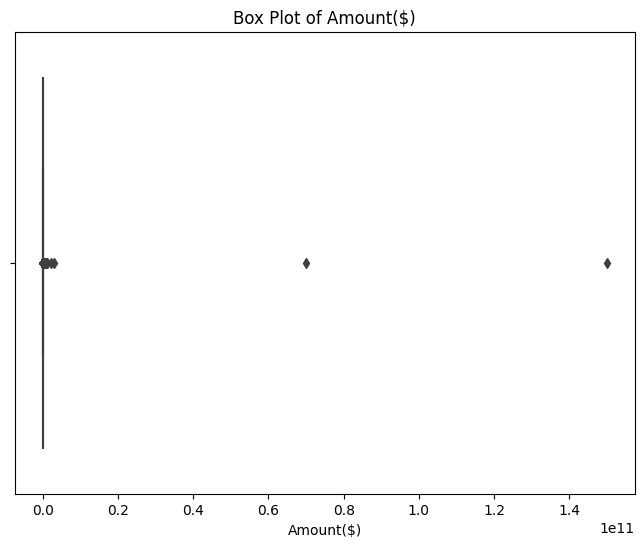

In [466]:
selected_variable = 'Amount($)'

# Create a box plot for the selected variable(s)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data[selected_variable])
plt.title('Box Plot of ' + selected_variable)
plt.xlabel(selected_variable)
plt.show()

In [467]:

median_amount = data['Amount($)'].median()
data['Amount($)'].fillna(median_amount, inplace=True)

In [468]:
data.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What it does     0
Founders         0
Investor         0
Year             0
dtype: int64

In [469]:
data['Amount($)'].value_counts()

Amount($)
0.0          402
2000000.0    272
1000000.0    167
3000000.0     81
5000000.0     80
            ... 
4050000.0      1
682000.0       1
410000.0       1
325000.0       1
6200000.0      1
Name: count, Length: 510, dtype: int64

In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2855 non-null   object 
 1   Sector         2855 non-null   object 
 2   Stage          2855 non-null   object 
 3   Amount($)      2855 non-null   float64
 4   HeadQuarter    2855 non-null   object 
 5   What it does   2855 non-null   object 
 6   Founders       2855 non-null   object 
 7   Investor       2855 non-null   object 
 8   Year           2855 non-null   object 
dtypes: float64(1), object(8)
memory usage: 223.0+ KB


In [471]:
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,Commerce,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Founder Unknown,Investor Unknown,2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,Founder Unknown,Investor Unknown,2018
2,MyLoanCare,Finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,Founder Unknown,Investor Unknown,2018
3,PayMe India,Finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Founder Unknown,Investor Unknown,2018
4,Eunimart,Commerce,Seed,2000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,Founder Unknown,Investor Unknown,2018


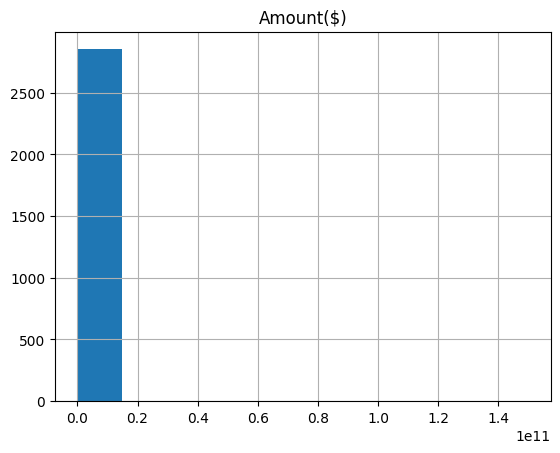

In [472]:
data.hist()
plt.show()

In [488]:
# Create a bivariate histogram for Amount($) conditioned on Sector
sns.histplot(data=data, x='Amount($)', hue='Sector', kde=True)
plt.title('Bivariate Histogram of Amount($) conditioned on Sector')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.legend(title='Sector')
plt.show()

I will be using Anova in this example since I have more than 2 classes in my Sector column. 19 to be precise. Let's verify

In [473]:
data['Sector'].unique()

array(['Commerce', 'Agriculture', 'Finance', 'Technology',
       'Business Intelligence', 'Food & Beverages', 'Manufacturing',
       'Transport', 'Hospitality', 'Telecommunications', 'Education',
       'Beauty & Fashion', 'Energy', 'LifeStyle', 'Media & Entertainment',
       'Health', 'Sports', 'Government', 'Real Estate'], dtype=object)

In [474]:
# Let's create the groups 

sector_and_amount = data.groupby('Sector')['Amount($)']

all_industries = ['Commerce', 'Agriculture', 'Finance', 'Technology', 'Food & Beverages','Education', 
                'Business Intelligence', 'Transport', 'Manufacturing','Energy', 'LifeStyle', 'Hospitality', 
                'Health', 'Sports','Beauty & Fashion', 'Real Estate', 'Media & Entertainment',
                'Government', 'Telecommunications']

industry_amounts = {industry: sector_and_amount.get_group(industry) for industry in all_industries}


# Calculate ANOVA
f_stat, p_value = stats.f_oneway(*industry_amounts.values())

print(f"The F-Stat is {f_stat}")
print(f"The P-Value is {p_value}")

The F-Stat is 0.269290062103314
The P-Value is 0.9990654017388415


Well, that is a no brainer. It looks like we have failed to reject the null hypothesis that 'Funding is not dependent on industry'.

 - Our P-value is almost 100%

Now, let's answer the questions we had.

#### Question 1. What industry received the most funding?

In [475]:
data['Amount($)'].isna().sum()

data['Amount($)'] = data['Amount($)'].astype('uint64')

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2855 non-null   object
 1   Sector         2855 non-null   object
 2   Stage          2855 non-null   object
 3   Amount($)      2855 non-null   uint64
 4   HeadQuarter    2855 non-null   object
 5   What it does   2855 non-null   object
 6   Founders       2855 non-null   object
 7   Investor       2855 non-null   object
 8   Year           2855 non-null   object
dtypes: object(8), uint64(1)
memory usage: 223.0+ KB


In [477]:
top_sectors = data[['Sector', 'Amount($)']].groupby('Sector').sum().sort_values(by='Amount($)', ascending=False).head(7)
top_sectors

,Amount($)
Sector,
Finance,160411088255
Commerce,78689354480
Technology,8388516662
Education,6222497290
Transport,5350423982
Food & Beverages,4260698000
Health,2251782995


#### Observations

Finance sector received the most funding, with a total amount of $160,411,088,255. indicating a strong investor interest in financial services and related industries.

Commerce, although receiving substantial funding, is still significantly lower than the Finance sector, suggesting a difference in investor confidence or market dynamics between these two sectors.

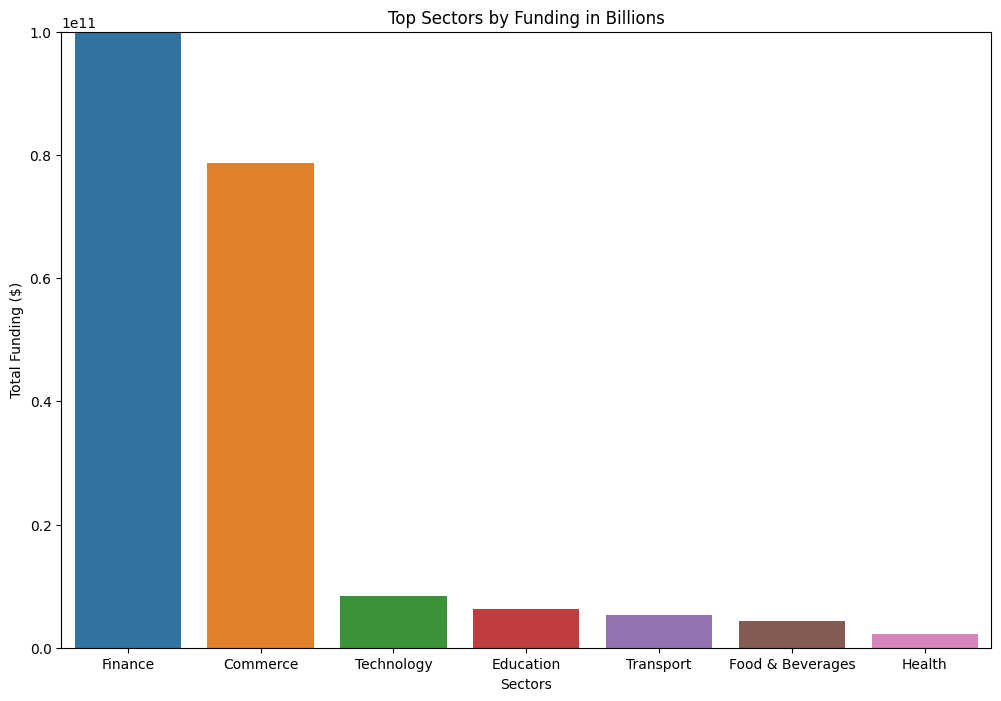

In [478]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_sectors.index, y='Amount($)', data=top_sectors)
ax.set_ylim([0, 100000000000]) # set the y limit to [0, 100 million]
plt.title('Top Sectors by Funding in Billions')
plt.xlabel('Sectors')
plt.ylabel('Total Funding ($)')
plt.show()

#### Question 2. Which locations receive more funding?

<Figure size 1200x600 with 0 Axes>

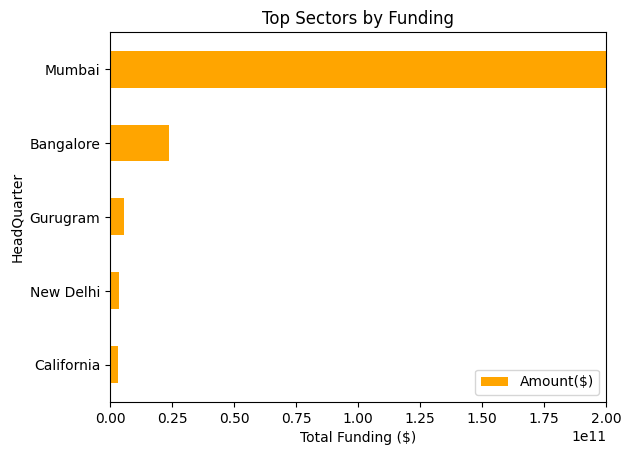

In [479]:
location = data[['HeadQuarter', 'Amount($)']].groupby('HeadQuarter').sum().sort_values(by='Amount($)', ascending=True).tail(5)
plt.figure(figsize=(12, 6))
ax = location.plot(kind='barh', color='orange')
plt.title('Top Sectors by Funding')
ax.set_xlim([0, 200000000000]) 
plt.ylabel('HeadQuarter')
plt.xlabel('Total Funding ($)')
plt.show()

#### Observations:

Based on the provided output, Mumbai and Bangalore are the locations that received the highest funding. 

The locations that received the lowest funding are California and New Delhi.


#### Question 3. In which year is funding the highest?

<Figure size 1200x600 with 0 Axes>

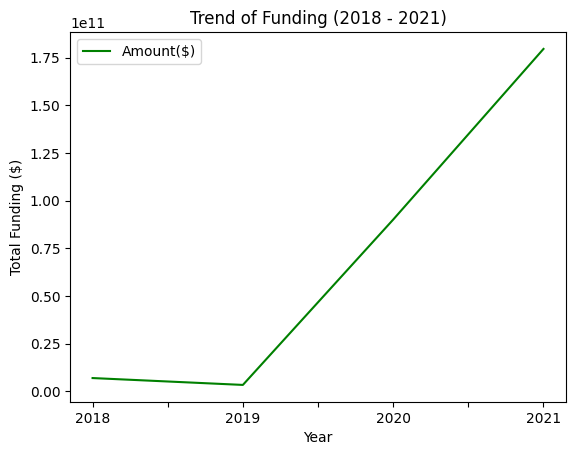

In [480]:
highest_funding = data[['Year', 'Amount($)']].groupby('Year').sum().sort_values(by='Year',ascending=True)
highest_funding
plt.figure(figsize=(12, 6))
highest_funding.plot(kind='line', color='green')
plt.title('Trend of Funding (2018 - 2021)')
plt.ylabel('Total Funding ($)')
plt.show()

#### Observation

The highest funding year is 2021 and the lost is 2018

#### Question 4. How many companies received funding above $100,000,000?

In [481]:
hundred_million_filter = data['Amount($)'] > 100000000
# condition_1

hundred_million = data.loc[hundred_million_filter, ['Company/Brand','Amount($)']].groupby('Company/Brand').sum().sort_values('Amount($)').tail(5)
hundred_million

,Amount($)
Company/Brand,
Swiggy,1913000000
Reliance,2200000000
Snowflake,3000000000
Reliance Retail Ventures Ltd,70000000000
Alteria Capital,150000000000


<Figure size 1200x600 with 0 Axes>

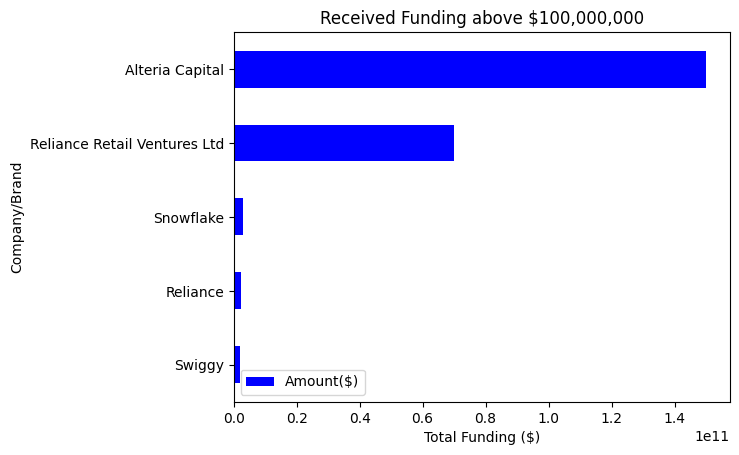

In [482]:
plt.figure(figsize=(12, 6))
hundred_million.plot(kind='barh', color='blue')
plt.title('Received Funding above $100,000,000')
plt.xlabel('Total Funding ($)')
plt.show()

#### Question 5. For companies in the pre-seed stage of funding, how much is the average pre-seed amount, and what industry are they in?

In [483]:
pre_seed = data['Stage'] == 'Pre-Seed'

average = data.loc[pre_seed, 'Amount($)'].mean()

print(f'The average amount for companies in the Pre-Seed sector is ${average:,.3f}')

The average amount for companies in the Pre-Seed sector is $474,338.235


In [484]:
sector_of_preseed = data[pre_seed].describe(include='object')
sector_of_preseed

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Founders,Investor,Year
count,68,68,68,68,68,68,68,68
unique,67,15,1,18,68,61,54,3
top,NeoDocs,Education,Pre-Seed,Bangalore,Tranzmeo Connect : is A Complete Comprehensive...,Founder Unknown,Investor Unknown,2021
freq,2,12,68,25,1,8,8,48


In [485]:
print(f'They tend to be in the {sector_of_preseed.iloc[2,1]} sector')

They tend to be in the Education sector
